# Libraries
---

In [1]:
# Manipulate dataframes
import pandas as pd

# graphic plots
import matplotlib.pyplot as plt
import scipy.stats as stats

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder # Normalize categorical columns
from sklearn.preprocessing import MinMaxScaler # Normalize numerical columns
from sklearn.impute import KNNImputer # Impute missing data

# Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

C:\Users\Lucas\AppData\Local\Temp\ipykernel_3136\2828621279.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data
---

In [2]:
data = pd.read_csv('../data/Protein_Supply_Quantity_Data.csv').dropna(subset=['Deaths']) # perde-se 6 registros
data.drop(labels='Unit (all except Population)',inplace=True, axis=1)

In [3]:
data

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0000,9.7523,0.0277,0.0000,35.9771,0.4067,0.0647,0.5824,3.1337,...,0.0000,1.1370,0.0462,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,0.1840,27.7469,0.0711,0.0000,14.2331,1.8069,0.6274,1.2757,7.6582,...,0.0084,3.2456,0.0544,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.0323,13.8360,0.0054,0.0000,26.5633,1.2916,0.6350,1.1624,3.5088,...,0.0269,3.1267,0.1399,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,0.6285,15.2311,0.0277,0.0000,20.3882,0.1756,5.4436,1.2754,7.6248,...,0.0092,0.8133,0.0924,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0
4,Antigua and Barbuda,0.1535,33.1901,0.1289,0.0000,10.5108,0.4850,8.2146,1.2586,16.0670,...,0.0430,1.6024,0.2947,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),0.1955,22.5411,0.1244,0.0000,21.6526,0.8707,2.6477,1.0662,11.8347,...,0.0533,1.0129,0.0267,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0
166,Vietnam,0.1555,20.4466,0.1555,0.0056,18.5247,0.7665,5.7435,0.7165,11.0426,...,0.0000,3.7216,0.0389,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0
167,Yemen,0.0000,10.0122,0.0188,0.0000,35.1179,0.4320,0.9392,0.4884,5.9453,...,0.0000,0.5448,0.0564,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0
168,Zambia,0.4824,9.8925,0.0338,0.0000,28.5182,0.5839,3.0126,0.0931,4.3158,...,0.0000,0.8039,0.0592,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0


In [4]:
data.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.000000,163.000000,164.000000,164.000000,164.000000,162.000000,1.640000e+02
mean,0.267652,21.138788,0.108662,0.009353,19.087073,1.163531,3.239076,0.850859,9.840726,5.994027,...,28.861552,0.021153,1.722838,0.172404,18.701227,2.021972,0.039370,1.452356,0.535158,4.562076e+07
std,0.245634,7.932568,0.152474,0.084450,6.486699,0.797818,2.693154,0.649383,4.680325,3.942305,...,7.932562,0.023802,0.994285,0.200208,9.420591,2.360454,0.048718,1.927617,1.329249,1.591165e+08
min,0.000000,4.456100,0.000000,0.000000,7.808100,0.042700,0.064700,0.059100,1.017900,0.264400,...,14.215800,0.000000,0.163100,0.000000,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.069725,14.385450,0.022475,0.000000,13.688800,0.431150,1.334675,0.494550,5.944825,2.435175,...,21.752600,0.005600,0.975100,0.032675,8.650000,0.140976,0.002013,0.099107,0.012028,2.926500e+06
50%,0.202750,21.772550,0.056250,0.000000,17.674350,1.105200,2.486450,0.712500,10.101100,5.683750,...,28.230300,0.015250,1.492900,0.100800,21.300000,1.011570,0.011998,0.475402,0.081040,1.031600e+07
75%,0.387925,28.243200,0.118250,0.000000,23.910175,1.678550,4.326400,0.992850,13.308625,8.662400,...,35.617975,0.028500,2.090050,0.224900,25.700000,3.487069,0.069503,2.622874,0.358183,3.279175e+07
max,1.366000,35.786000,0.980700,1.071900,35.977100,3.573500,18.078900,4.649400,21.625000,16.475000,...,45.551500,0.113500,5.054600,1.130500,45.500000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   164 non-null    object 
 1   Alcoholic Beverages       164 non-null    float64
 2   Animal Products           164 non-null    float64
 3   Animal fats               164 non-null    float64
 4   Aquatic Products, Other   164 non-null    float64
 5   Cereals - Excluding Beer  164 non-null    float64
 6   Eggs                      164 non-null    float64
 7   Fish, Seafood             164 non-null    float64
 8   Fruits - Excluding Wine   164 non-null    float64
 9   Meat                      164 non-null    float64
 10  Milk - Excluding Butter   164 non-null    float64
 11  Offals                    164 non-null    float64
 12  Oilcrops                  164 non-null    float64
 13  Pulses                    164 non-null    float64
 14  Spices         

In [6]:
# Conferindo se cada linha corresponde a um país
data.Country.value_counts()

Country
Afghanistan    1
Nepal          1
New Zealand    1
Nicaragua      1
Niger          1
              ..
Germany        1
Ghana          1
Greece         1
Grenada        1
Zimbabwe       1
Name: count, Length: 164, dtype: int64

# Normalization
---

## Categorical Columns
---

In [7]:
OHE = OneHotEncoder()

In [8]:
colunas_categoricas = data[['Country','Undernourished']]

In [9]:
data_encoded = OHE.fit_transform(colunas_categoricas)
data_encoded_df = pd.DataFrame(data_encoded.toarray(), columns=OHE.get_feature_names_out(colunas_categoricas.columns), index=colunas_categoricas.index)

In [10]:
data_encoded_df

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Undernourished_8.5,Undernourished_8.7,Undernourished_8.9,Undernourished_9,Undernourished_9.3,Undernourished_9.5,Undernourished_9.7,Undernourished_9.9,Undernourished_<2.5,Undernourished_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Numerical Columns
---

In [11]:
MMS = MinMaxScaler()

In [12]:
colunas_numericas = data.drop(labels=['Country','Undernourished'], axis=1)

In [13]:
data_scaled = MMS.fit_transform(colunas_numericas)
data_scaled_df = pd.DataFrame(data_scaled, columns=colunas_numericas.columns , index=colunas_numericas.index)

In [14]:
data_scaled_df

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetal Products,Vegetable Oils,Vegetables,Miscellaneous,Obesity,Confirmed,Deaths,Recovered,Active,Population
0,0.000000,0.169046,0.028245,0.000000,1.000000,0.103093,0.000000,0.114001,0.102673,0.324689,...,0.830743,0.000000,0.199100,0.040867,0.055300,0.013626,0.033360,0.013648,0.001568,0.027721
1,0.134700,0.743405,0.072499,0.000000,0.228088,0.499660,0.031236,0.265037,0.322234,1.000000,...,0.256557,0.074009,0.630175,0.048120,0.465438,0.285071,0.274778,0.198303,0.140117,0.001985
2,0.023646,0.299391,0.005506,0.000000,0.665810,0.353716,0.031658,0.240355,0.120876,0.480994,...,0.700594,0.237004,0.605867,0.123751,0.564516,0.023500,0.035368,0.018537,0.008824,0.031592
3,0.460102,0.343921,0.028245,0.000000,0.446594,0.037640,0.298592,0.264972,0.320613,0.054384,...,0.656197,0.081057,0.132924,0.081734,0.108295,0.005897,0.007877,0.006284,0.000426,0.023153
4,0.112372,0.917143,0.131437,0.000000,0.095946,0.125269,0.452415,0.261312,0.730287,0.442334,...,0.082982,0.378855,0.294245,0.260681,0.391705,0.028206,0.038521,0.021108,0.011960,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.143119,0.577244,0.126848,0.000000,0.491480,0.234508,0.143387,0.219397,0.524906,0.372836,...,0.422480,0.469604,0.173730,0.023618,0.532258,0.043455,0.023119,0.046947,0.002980,0.020388
166,0.113836,0.510391,0.158560,0.005224,0.380439,0.204996,0.315240,0.143215,0.486468,0.050849,...,0.489726,0.000000,0.727486,0.034410,0.000000,0.000168,0.000196,0.000169,0.000062,0.068568
167,0.000000,0.177342,0.019170,0.000000,0.969498,0.110258,0.048545,0.093523,0.239112,0.104783,...,0.822299,0.000000,0.078033,0.049889,0.276498,0.000655,0.011120,0.000530,0.000035,0.021230
168,0.353148,0.173521,0.034465,0.000000,0.735209,0.153280,0.163643,0.007407,0.160037,0.047376,...,0.826402,0.000000,0.131003,0.052366,0.101382,0.032074,0.024612,0.032138,0.004869,0.013071


## Concated Data
---

In [15]:
new_data = pd.concat([data_scaled_df, data_encoded_df], axis=1)
new_data.drop(labels='Undernourished_nan', inplace=True, axis=1)
new_data

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Undernourished_8.3,Undernourished_8.5,Undernourished_8.7,Undernourished_8.9,Undernourished_9,Undernourished_9.3,Undernourished_9.5,Undernourished_9.7,Undernourished_9.9,Undernourished_<2.5
0,0.000000,0.169046,0.028245,0.000000,1.000000,0.103093,0.000000,0.114001,0.102673,0.324689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.134700,0.743405,0.072499,0.000000,0.228088,0.499660,0.031236,0.265037,0.322234,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.023646,0.299391,0.005506,0.000000,0.665810,0.353716,0.031658,0.240355,0.120876,0.480994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.460102,0.343921,0.028245,0.000000,0.446594,0.037640,0.298592,0.264972,0.320613,0.054384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.112372,0.917143,0.131437,0.000000,0.095946,0.125269,0.452415,0.261312,0.730287,0.442334,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.143119,0.577244,0.126848,0.000000,0.491480,0.234508,0.143387,0.219397,0.524906,0.372836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.113836,0.510391,0.158560,0.005224,0.380439,0.204996,0.315240,0.143215,0.486468,0.050849,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
167,0.000000,0.177342,0.019170,0.000000,0.969498,0.110258,0.048545,0.093523,0.239112,0.104783,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,0.353148,0.173521,0.034465,0.000000,0.735209,0.153280,0.163643,0.007407,0.160037,0.047376,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Train-Test Split
---

In [16]:
x = new_data.drop(columns=['Deaths'])
y = new_data['Deaths']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Verificando linhas e colunas
---

In [17]:
x_train.shape, x_test.shape

((114, 286), (50, 286))

In [18]:
y_train.shape, y_test.shape

((114,), (50,))

## Verificando dados ausentes
---

In [19]:
x_train.isnull().sum().sum(), x_test.isnull().sum().sum()

(2, 1)

In [20]:
y_train.isnull().sum().sum(), y_test.isnull().sum().sum()

(0, 0)

# Missing Data
---

In [21]:
data.isnull().sum()

Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar Crops                 0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Miscellaneous               0
Obesity                     1
Undernourished              7
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      2
Population                  0
dtype: int64

In [22]:
data.columns[data.isnull().any()].tolist()

['Obesity', 'Undernourished', 'Active']

In [23]:
# Verificando colunas com mais da metade de campos não preenchidos
for coluna in data.columns:
    if ((data[coluna] == 0).sum()) > 82:
        print(f'A coluna *{coluna}* possui mais de 82 campos Nan')
        print('----'*20)

A coluna *Aquatic Products, Other* possui mais de 82 campos Nan
--------------------------------------------------------------------------------
A coluna *Sugar Crops* possui mais de 82 campos Nan
--------------------------------------------------------------------------------
A coluna *Sugar & Sweeteners* possui mais de 82 campos Nan
--------------------------------------------------------------------------------


In [24]:
(data['Aquatic Products, Other'] == 0).sum(), (data['Sugar Crops'] == 0).sum(), (data['Sugar & Sweeteners'] == 0).sum()

(139, 144, 101)

In [25]:
# data = pd.read_csv('../data/Protein_Supply_Quantity_Data.csv',na_values='0')
# data = data.dropna(subset=['Deaths'])
# data

# Imputation
---

In [26]:
imputer = KNNImputer(n_neighbors=5)

x_train_complete = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_complete = pd.DataFrame(imputer.fit_transform(x_test), columns=x_test.columns, index=x_test.index)

In [27]:
x_train = x_train_complete
x_test = x_test_complete

In [28]:
# Verificando a possibilidade de valores faltantes
x_train_complete.isnull().sum().sum(), x_test_complete.isnull().sum().sum()

(0, 0)

# Regression
---

##  Tuning
---

In [29]:
rf_regressor = RandomForestRegressor(random_state=0)

In [30]:
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [31]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
# param_grid = {
#     'n_estimators': [50, 100, 150, 200, 250, 300],
#     'max_depth': [None, 3, 6, 9, 12, 15],
#     'max_features': [1, 2, 3, 5, 6, 9, 10, 12],
#     'min_samples_split': [2, 4, 6, 8],
#     'min_samples_leaf': [1, 2, 4, 8]
# }

In [33]:
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [34]:
# Melhores hiperparâmetros
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [35]:
best_rf_regressor = grid_search.best_estimator_
best_rf_regressor

RandomForestRegressor(n_estimators=150, random_state=0)

In [36]:
best_rf_regressor.score(x_test, y_test)

0.8335215138476558

# Validation Metrics
---

In [37]:
predictions = best_rf_regressor.predict(x_test)

In [38]:
mean_absolute_error(y_test, predictions)

0.060845354099924975

In [39]:
mean_squared_error(y_test, predictions)

0.009837290438073975

# Graphs
---

## Residual plot
---

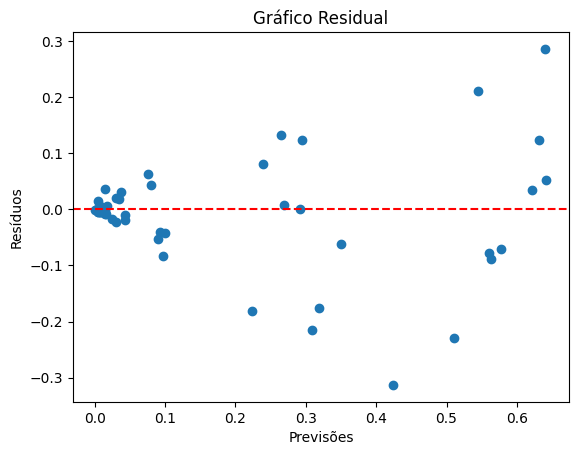

In [48]:
# Calcular os resíduos
residuals = y_test - predictions

# Plotar o gráfico residual
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Gráfico Residual')
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Probability plot
---

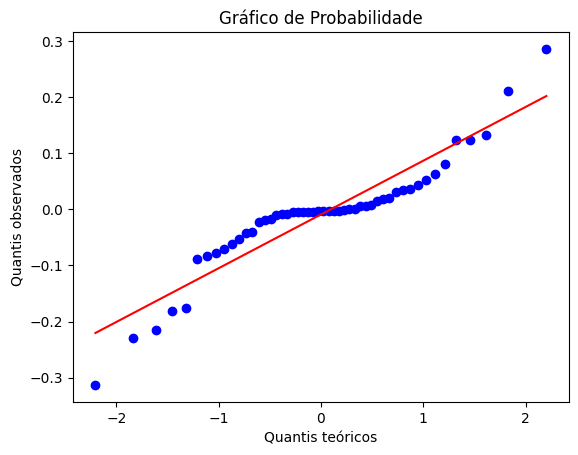

In [41]:
# Plotar o gráfico de probabilidade
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Gráfico de Probabilidade')
plt.xlabel('Quantis teóricos')
plt.ylabel('Quantis observados')
plt.show()